In [96]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [97]:
with open('get_cat.txt', 'r') as file:
    data = file.readlines()
df = pd.DataFrame(eval(data[0]))
df[['Type','Year-Month']] = pd.DataFrame(df[0].tolist(), index= df.index)
df = df.iloc[:, 1:]
df = df.rename(columns={1: 'Value'})
ether_val = df.pop('Value') 
df.insert(2, 'Value', ether_val)
df.head()

,Type,Year-Month,Value
0,Scamming,2017-11,3.313866e+18
1,Phishing,2018-11,7.530243e+19
2,Phishing,2017-07,1.060149e+22
3,Scamming,2018-12,4.788961e+20
4,Scamming,2018-03,3.306005e+21


In [98]:
df_sorted=df.sort_values(by="Year-Month", key=lambda x: pd.to_datetime(x, format="%Y-%m"))


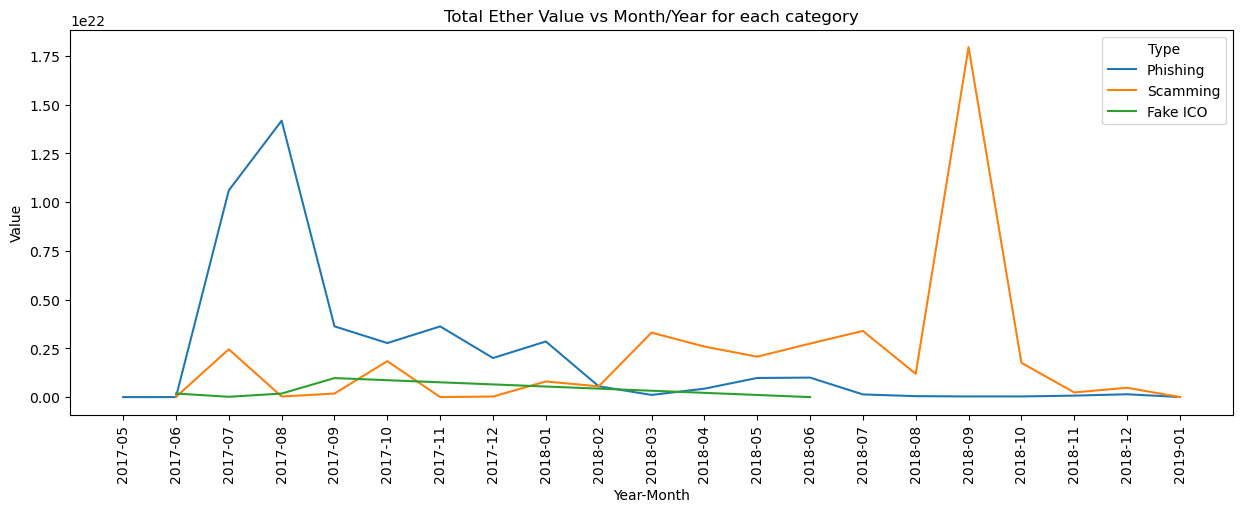

In [99]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year-Month', y='Value', hue='Type', data=df_sorted)

plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Total Ether Value vs Month/Year for each category')
plt.xticks(rotation=90)
plt.show()

In [121]:

with open('get_status_with_category_and_time.txt', 'r') as file:
    data = file.readlines()
df = pd.DataFrame(eval(data[0]))
df[['Type', 'Status','Year-Month']] = pd.DataFrame(df[0].tolist(), index= df.index)
df = df.iloc[:, 1:]
df = df.rename(columns={1: 'Value'})
ether_val = df.pop('Value') 
df.insert(3, 'Value', ether_val)
df.head()

,Type,Status,Year-Month,Value
0,Phishing,Active,2017-10,1.750930e+19
1,Fake ICO,Offline,2017-07,1.624220e+19
2,Fake ICO,Offline,2017-09,9.751384e+20
3,Phishing,Offline,2017-10,2.753699e+21
4,Phishing,Active,2017-08,7.582544e+20


In [122]:
df_active=df[df['Status'] == 'Active']
df_active_sorted=df_active.sort_values(by="Year-Month", key=lambda x: pd.to_datetime(x, format="%Y-%m"))

df_inactive=df[df['Status'] == 'Inactive']
df_inactive_sorted=df_inactive.sort_values(by="Year-Month", key=lambda x: pd.to_datetime(x, format="%Y-%m"))

df_suspended=df[df['Status'] == 'Suspended']
df_suspended_sorted=df_suspended.sort_values(by="Year-Month", key=lambda x: pd.to_datetime(x, format="%Y-%m"))

df_offline=df[df['Status'] == 'Offline']
df_offline_sorted=df_offline.sort_values(by="Year-Month", key=lambda x: pd.to_datetime(x, format="%Y-%m"))

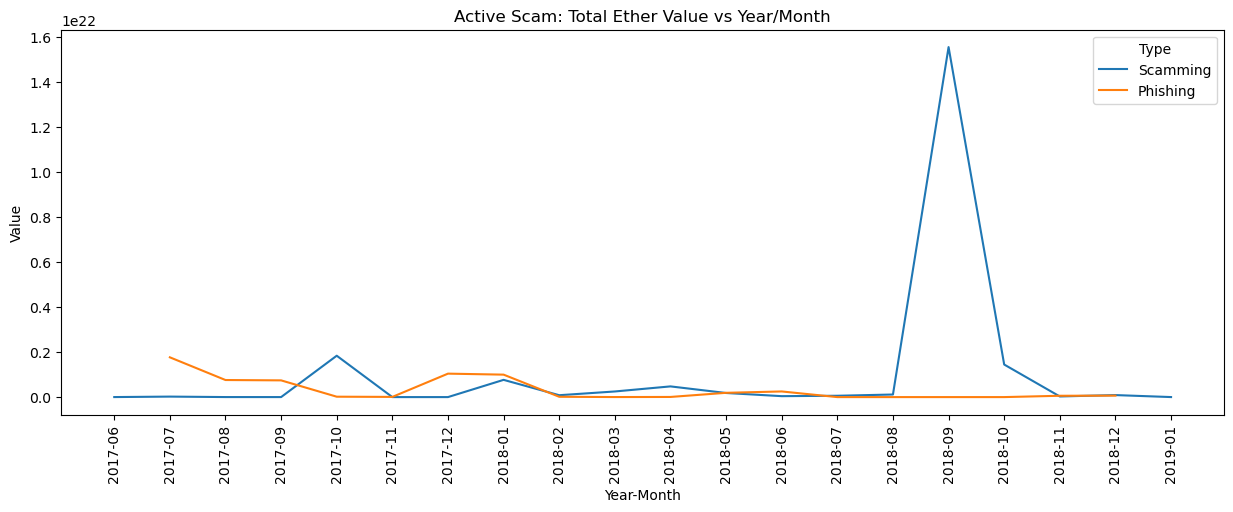

In [123]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year-Month', y='Value', hue='Type', data=df_active_sorted)

# add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Active Scam: Total Ether Value vs Year/Month')
plt.xticks(rotation=90)
plt.show()

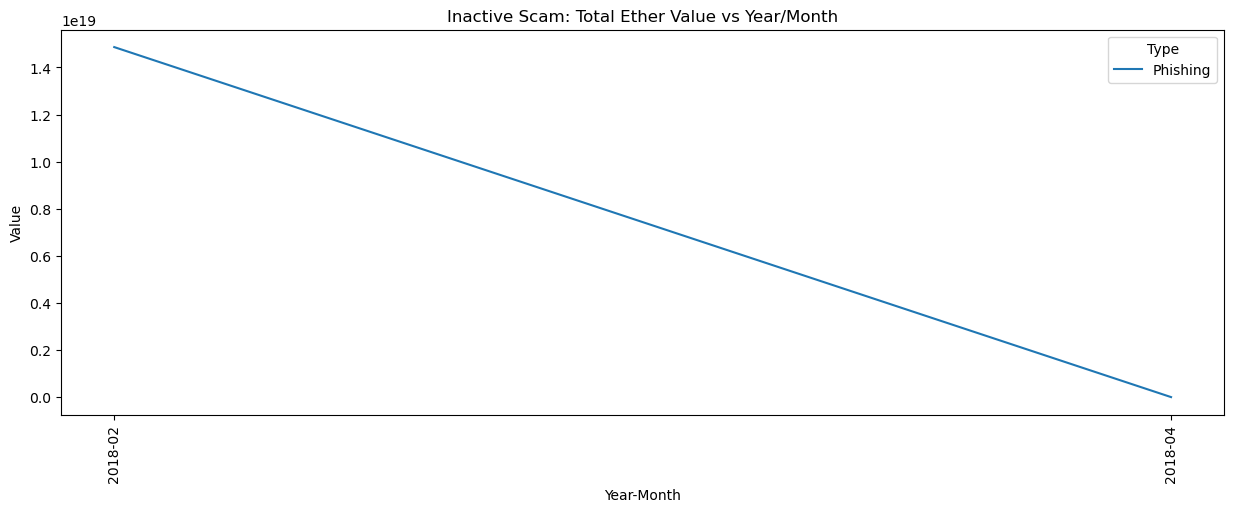

In [124]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year-Month', y='Value', hue='Type', data=df_inactive_sorted)

# add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Inactive Scam: Total Ether Value vs Year/Month')
plt.xticks(rotation=90)
plt.show()

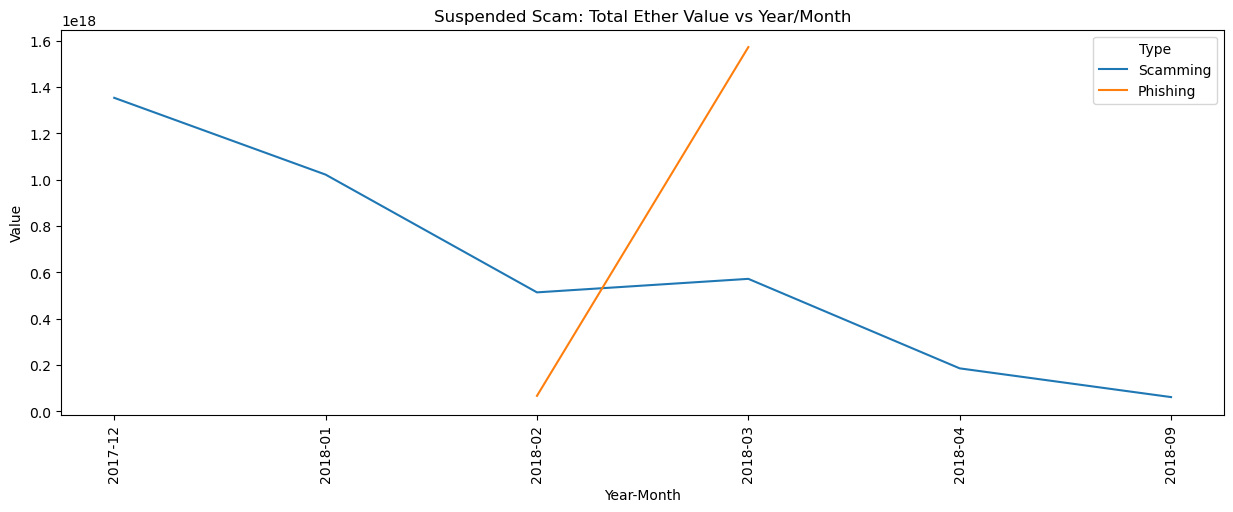

In [125]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year-Month', y='Value', hue='Type', data=df_suspended_sorted)

# add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Suspended Scam: Total Ether Value vs Year/Month')
plt.xticks(rotation=90)
plt.show()

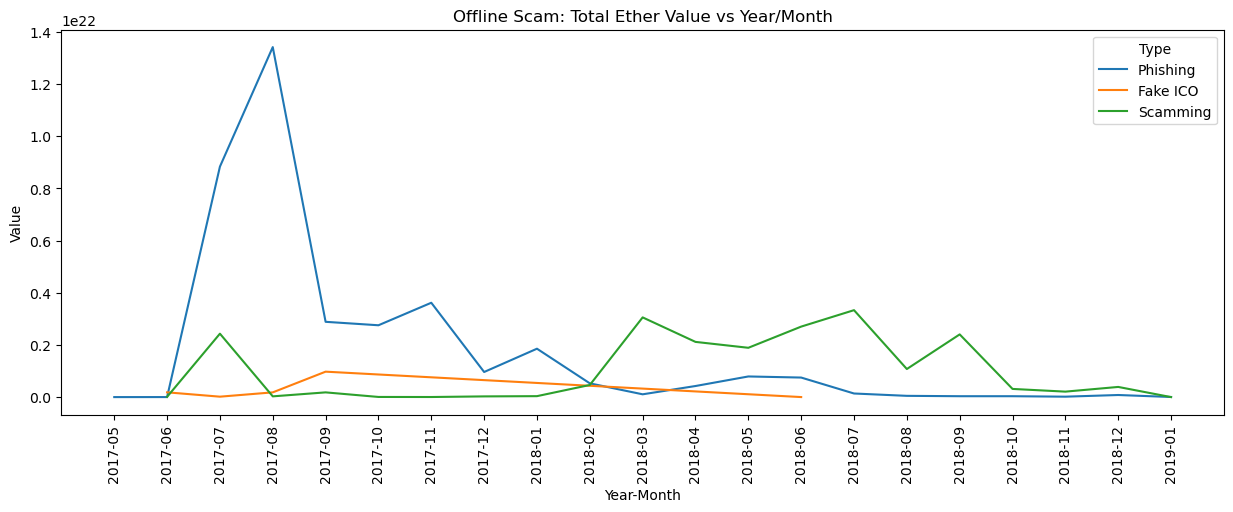

In [126]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year-Month', y='Value', hue='Type', data=df_offline_sorted)

# add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Offline Scam: Total Ether Value vs Year/Month')
plt.xticks(rotation=90)
plt.show()

In [127]:
with open('get_status_for_category.txt', 'r') as file:
    data = file.readlines()
df = pd.DataFrame(eval(data[0]))
df[['Type', 'Status']] = pd.DataFrame(df[0].tolist(), index= df.index)
df = df.iloc[:, 1:]
df = df.rename(columns={1: 'Value'})
ether_val = df.pop('Value') 
df.insert(2, 'Value', ether_val)



In [128]:
df_sorted=df.sort_values(by="Status")
df_sorted

,Type,Status,Value
4,Scamming,Active,2.094806e+22
6,Phishing,Active,5.921111e+21
3,Phishing,Inactive,1.487064e+19
0,Phishing,Offline,3.728094e+22
2,Fake ICO,Offline,1.356458e+21
5,Scamming,Offline,2.067522e+22
1,Phishing,Suspended,1.639908e+18
7,Scamming,Suspended,3.710168e+18


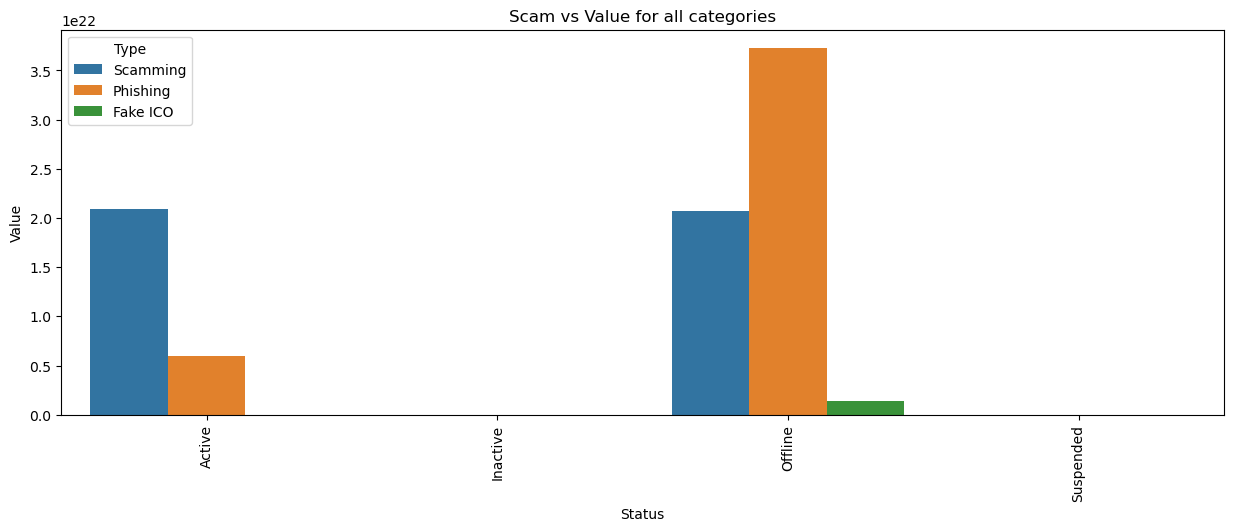

In [129]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Status', y='Value', hue='Type', data=df_sorted)

# add labels and title
plt.xlabel('Status')
plt.ylabel('Value')
plt.title('Scam vs Value for all categories')
plt.xticks(rotation=90)
plt.show()

In [130]:
import ast
import matplotlib.pyplot as plt

def get_graph(filename, title):

    f = open (filename, 'r')
    h = f.readlines()
    x = ast.literal_eval(h[0])
    date = []
    value = []

    for i in x:
        date.append(i[0])
        value.append(i[1])

    plt.figure(figsize=(10, 8), dpi=80)
    plt.plot(date, value)
    plt.title(title)
    plt.xlabel('Date: Year-Month')
    plt.ylabel('Ether received')
    plt.xticks(rotation = 90)
    plt.show()

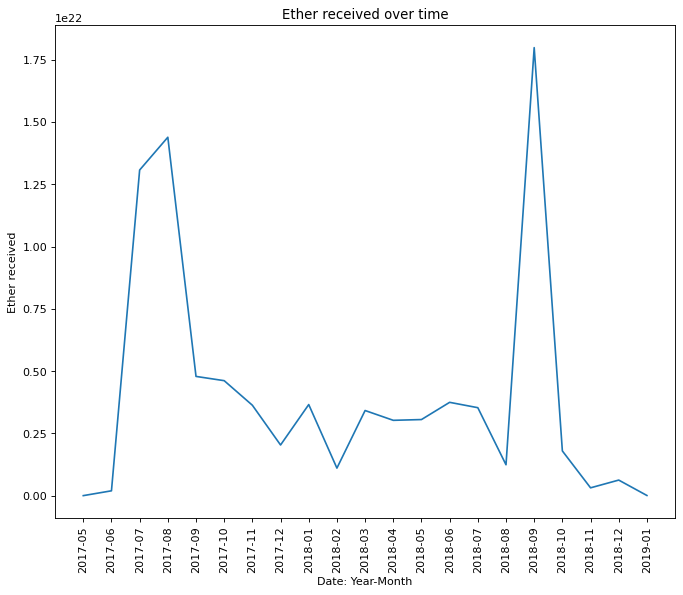

In [131]:
get_graph("ether_recived_over_time.txt", 'Ether received over time')